<a href="https://colab.research.google.com/github/SurajJadhav-5/Heart_Disease_Prediction_Viz/blob/main/2_DataCleaning_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data Cleaning

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


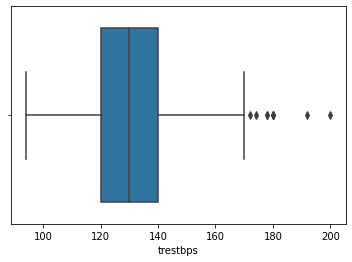

In [ ]:
sns.boxplot(data['trestbps'])

In [ ]:
data['trestbps'][data['trestbps'] > 175].count()

7

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


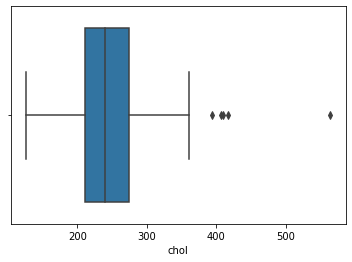

In [ ]:
sns.boxplot(data['chol'])

In [ ]:
data['chol'][data['chol']> 360].count()

5

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


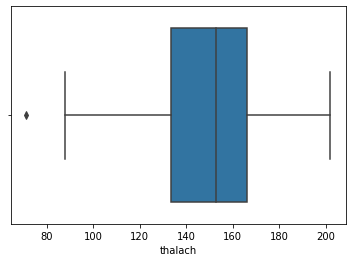

In [ ]:
sns.boxplot(data['thalach'])


In [ ]:
data['thalach'][data['thalach'] < 85].count()

1

In [ ]:
data[(data['trestbps'] > 175) | (data['chol'] > 360) | (data['thalach'] < 85)].count()

age         13
sex         13
cp          13
trestbps    13
chol        13
fbs         13
restecg     13
thalach     13
exang       13
oldpeak     13
slope       13
ca          13
thal        13
target      13
dtype: int64

In [ ]:
data = data.drop(data[(data['trestbps'] > 175) | (data['chol'] > 360) | (data['thalach'] < 85)].index)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       290 non-null    int64  
 1   sex       290 non-null    int64  
 2   cp        290 non-null    int64  
 3   trestbps  290 non-null    int64  
 4   chol      290 non-null    int64  
 5   fbs       290 non-null    int64  
 6   restecg   290 non-null    int64  
 7   thalach   290 non-null    int64  
 8   exang     290 non-null    int64  
 9   oldpeak   290 non-null    float64
 10  slope     290 non-null    int64  
 11  ca        290 non-null    int64  
 12  thal      290 non-null    int64  
 13  target    290 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.0 KB


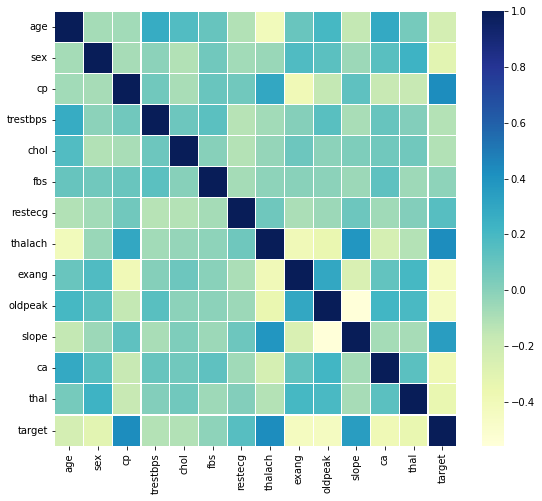

In [ ]:
corrmat = data.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [ ]:
corrmat

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.074393,-0.069735,0.274152,0.172226,0.103023,-0.111191,-0.411258,0.094841,0.206728,-0.161388,0.289798,0.055012,-0.230083
sex,-0.074393,1.000000,-0.081202,-0.009799,-0.111895,0.071271,-0.065227,-0.043418,0.175729,0.139167,-0.049243,0.147492,0.234537,-0.302614
cp,-0.069735,-0.081202,1.000000,0.073958,-0.088919,0.096119,0.069364,0.297549,-0.393278,-0.158170,0.125579,-0.170617,-0.174513,0.430488
trestbps,0.274152,-0.009799,0.073958,1.000000,0.083031,0.136158,-0.125224,-0.070776,0.012453,0.145719,-0.087196,0.099440,0.014477,-0.119106
chol,0.172226,-0.111895,-0.088919,0.083031,1.000000,0.005485,-0.118826,-0.029959,0.084134,-0.008774,0.030891,0.071607,0.070263,-0.112803
fbs,0.103023,0.071271,0.096119,0.136158,0.005485,1.000000,-0.074615,-0.014358,-0.003144,-0.008258,-0.048018,0.129105,-0.053298,-0.012352
restecg,-0.111191,-0.065227,0.069364,-0.125224,-0.118826,-0.074615,1.000000,0.077752,-0.095448,-0.049752,0.085439,-0.060159,0.016259,0.153368
thalach,-0.411258,-0.043418,0.297549,-0.070776,-0.029959,-0.014358,0.077752,1.000000,-0.396612,-0.349781,0.387851,-0.238915,-0.118056,0.432226
exang,0.094841,0.175729,-0.393278,0.012453,0.084134,-0.003144,-0.095448,-0.396612,1.000000,0.296976,-0.259663,0.113352,0.206161,-0.435424
oldpeak,0.206728,0.139167,-0.158170,0.145719,-0.008774,-0.008258,-0.049752,-0.349781,0.296976,1.000000,-0.558018,0.217761,0.191851,-0.440543


No two variables are highly related so we can say that all variables are independent of each other.

## Modelling

In [ ]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
target = data['target']

In [ ]:
X = data[columns]
y = target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [ ]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
214,56,1,0,125,249,1,0,144,1,1.2,1,1,2
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3


In [ ]:
y_train.head()

69     1
214    0
38     1
16     1
300    0
Name: target, dtype: int64

In [ ]:

linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)
accuracy_linreg = linreg.score(X_test, y_test)
print("Linear Reg accuracy ",accuracy_linreg)

Linear Reg accuracy  0.5113312139796005


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
accuracy_logreg = logreg.score(X_test, y_test)
print("Logistic Reg accuracy ",accuracy_logreg)

Logistic Reg accuracy  0.9041095890410958


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
cm = confusion_matrix(y_test, predictions)
cm


array([[25,  4],
       [ 3, 41]])

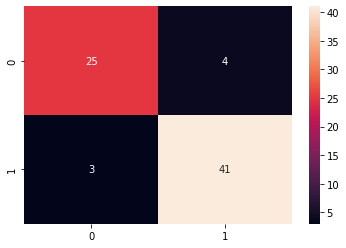

In [ ]:
sns.heatmap(cm, annot = True)

In [ ]:
svm_reg = SVR ()
svm_reg.fit(X_train, y_train)
svm_pred = svm_reg.predict(X_test)
accuracy_SVR = svm_reg.score(X_test, y_test)
print("SVM Reg accuracy ",accuracy_SVR)

SVM Reg accuracy  0.28192690312436686


In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

accuracy_dt = decision_tree.score(X_test, y_test)
print("Decision Tree accuracy is ", accuracy_dt)

Decision Tree accuracy is  0.7671232876712328


In [ ]:
ranfor = RandomForestClassifier(n_estimators=100)
ranfor.fit(X_train, y_train)
acc_ranfor = ranfor.score(X_test, y_test)
print("Random Forest accuracy is ", acc_ranfor)

Random Forest accuracy is  0.9041095890410958


In [ ]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
adaboost_acc = adaboost.score(X_test, y_test)
print("Adaboost Accuracy is ", adaboost_acc)

Adaboost Accuracy is  0.7671232876712328


## Transforming data

In [ ]:
mm = MinMaxScaler()
minmax = ColumnTransformer([
          ("MinMaxScaler", mm, ['age', 'trestbps', 'chol', 'thalach'])], remainder= "passthrough")

In [ ]:
minmax.fit(data)

ColumnTransformer(remainder='passthrough',
                  transformers=[('MinMaxScaler', MinMaxScaler(),
                                 ['age', 'trestbps', 'chol', 'thalach'])])

In [ ]:
data_trans = minmax.transform(data)

In [ ]:
pd.DataFrame(data_trans).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.708333,0.6375,0.457265,0.543860,1.0,3.0,1.0,0.0,0.0,2.3,0.0,0.0,1.0,1.0
1,0.166667,0.4500,0.529915,0.868421,1.0,2.0,0.0,1.0,0.0,3.5,0.0,0.0,2.0,1.0
2,0.250000,0.4500,0.333333,0.736842,0.0,1.0,0.0,0.0,0.0,1.4,2.0,0.0,2.0,1.0
3,0.562500,0.3250,0.470085,0.789474,1.0,1.0,0.0,1.0,0.0,0.8,2.0,0.0,2.0,1.0
4,0.583333,0.3250,0.974359,0.657895,0.0,0.0,0.0,1.0,1.0,0.6,2.0,0.0,2.0,1.0


In [ ]:
data_trans = pd.DataFrame(data_trans, columns=['age', 'trestbps', 'chol', 'thalach', 'sex', 'cp', 'fbs', 'restecg',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])

In [ ]:
data_trans.head()


,age,trestbps,chol,thalach,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,target
0,0.708333,0.6375,0.457265,0.543860,1.0,3.0,1.0,0.0,0.0,2.3,0.0,0.0,1.0,1.0
1,0.166667,0.4500,0.529915,0.868421,1.0,2.0,0.0,1.0,0.0,3.5,0.0,0.0,2.0,1.0
2,0.250000,0.4500,0.333333,0.736842,0.0,1.0,0.0,0.0,0.0,1.4,2.0,0.0,2.0,1.0
3,0.562500,0.3250,0.470085,0.789474,1.0,1.0,0.0,1.0,0.0,0.8,2.0,0.0,2.0,1.0
4,0.583333,0.3250,0.974359,0.657895,0.0,0.0,0.0,1.0,1.0,0.6,2.0,0.0,2.0,1.0


In [ ]:
data_trans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       290 non-null    float64
 1   trestbps  290 non-null    float64
 2   chol      290 non-null    float64
 3   thalach   290 non-null    float64
 4   sex       290 non-null    float64
 5   cp        290 non-null    float64
 6   fbs       290 non-null    float64
 7   restecg   290 non-null    float64
 8   exang     290 non-null    float64
 9   oldpeak   290 non-null    float64
 10  slope     290 non-null    float64
 11  ca        290 non-null    float64
 12  thal      290 non-null    float64
 13  target    290 non-null    float64
dtypes: float64(14)
memory usage: 31.8 KB


In [ ]:
X = data_trans[columns]
y = data_trans['target']
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X, y, test_size = 0.25, random_state=42)

In [ ]:
X_train_t

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
68,0.687500,0.0,0.0,0.3750,0.354701,0.0,1.0,0.657895,0.0,0.0,2.0,0.0,2.0
208,0.562500,1.0,0.0,0.3875,0.525641,1.0,0.0,0.491228,1.0,1.2,1.0,1.0,2.0
37,0.750000,0.0,2.0,0.7625,0.611111,0.0,1.0,0.526316,0.0,0.8,2.0,0.0,2.0
16,0.604167,0.0,2.0,0.3250,0.914530,0.0,1.0,0.736842,0.0,0.0,2.0,0.0,2.0
287,0.812500,1.0,0.0,0.6250,0.286325,1.0,1.0,0.464912,0.0,3.4,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.645833,1.0,0.0,0.6375,0.666667,0.0,0.0,0.473684,1.0,2.8,1.0,2.0,3.0
71,0.000000,1.0,1.0,0.4500,0.333333,0.0,0.0,1.000000,0.0,0.0,2.0,0.0,2.0
106,0.583333,1.0,2.0,0.7000,0.000000,1.0,1.0,0.745614,0.0,0.2,2.0,1.0,3.0
270,0.229167,1.0,0.0,0.7250,0.414530,0.0,1.0,0.815789,0.0,0.0,2.0,0.0,3.0


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_t, y_train_t)
predictions = logreg.predict(X_test_t)
logreg.score(X_test_t, y_test_t)

0.8904109589041096

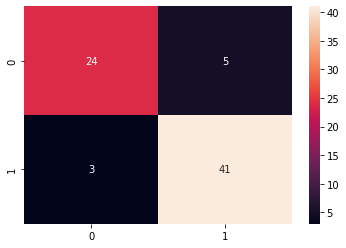

In [ ]:
cm = confusion_matrix(y_test_t, predictions)
sns.heatmap(cm, annot = True)

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_t, y_train_t)

accuracy_dt = decision_tree.score(X_test_t, y_test_t)
print("Decision Tree accuracy is ", accuracy_dt)

Decision Tree accuracy is  0.7808219178082192


In [ ]:
ranfor = RandomForestClassifier(n_estimators=100)
ranfor.fit(X_train_t, y_train_t)
acc_ranfor = ranfor.score(X_test_t, y_test_t)
print("Random Forest accuracy is ", acc_ranfor)

Random Forest accuracy is  0.863013698630137


In [ ]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train_t, y_train_t)
adaboost_acc = adaboost.score(X_test_t, y_test_t)
print("Adaboost Accuracy is ", adaboost_acc)

Adaboost Accuracy is  0.7671232876712328
